In [21]:
import pandas as pd
from IPython.display import display
import numpy as np

### Reading the CSV file

In [4]:
df = pd.read_csv(r'Custom_CNN_Features.csv')

In [5]:
display(df)

,Filename,Class Label,f0,f1,f2,f3,f4,f5,f6,f7,...,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199
0,1.png,2,50.557468,0.0,0.0,0.0,0.0,0.0,0.000000,0,...,316.271667,0.0,239.577011,277.834534,205.776398,0.0,0.0,0.0,0.0,91.438698
1,10.jpg.png,2,125.256027,0.0,0.0,0.0,0.0,0.0,48.989120,0,...,1317.333740,0.0,1000.075012,1118.496948,1030.366699,0.0,0.0,0.0,0.0,297.483124
2,10.png,2,50.160606,0.0,0.0,0.0,0.0,0.0,0.000000,0,...,330.470978,0.0,251.886398,288.062134,220.889481,0.0,0.0,0.0,0.0,93.795654
3,100.png,2,63.720730,0.0,0.0,0.0,0.0,0.0,0.000000,0,...,442.839233,0.0,345.145599,389.100678,304.433990,0.0,0.0,0.0,0.0,117.381722
4,10091.jpg,2,64.484604,0.0,0.0,0.0,0.0,0.0,37.368713,0,...,835.147400,0.0,649.643616,693.101868,690.640564,0.0,0.0,0.0,0.0,159.916016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,patch_84.jpg.png,2,283.005707,0.0,0.0,0.0,0.0,0.0,73.068192,0,...,2643.636230,0.0,2036.106934,2269.582275,1973.414917,0.0,0.0,0.0,0.0,657.907715
3249,patch_85.jpg.png,2,609.193603,0.0,0.0,0.0,0.0,0.0,131.018112,0,...,5950.206055,0.0,4727.840820,5170.731934,4594.757324,0.0,0.0,0.0,0.0,1362.733398
3250,patch_86.jpg.png,2,781.789490,0.0,0.0,0.0,0.0,0.0,174.997360,0,...,7535.423828,0.0,5972.883789,6563.629883,5749.376465,0.0,0.0,0.0,0.0,1758.735840
3251,patch_87.jpg.png,2,688.966675,0.0,0.0,0.0,0.0,0.0,206.603851,0,...,7119.000977,0.0,5575.274414,6160.208984,5423.260742,0.0,0.0,0.0,0.0,1670.340088


### Data types of attributes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3253 entries, 0 to 3252
Columns: 202 entries, Filename to f199
dtypes: float64(174), int64(27), object(1)
memory usage: 5.0+ MB


In [8]:
df.dtypes

Filename        object
Class Label      int64
f0             float64
f1             float64
f2             float64
                ...   
f195           float64
f196           float64
f197           float64
f198           float64
f199           float64
Length: 202, dtype: object

In [10]:
floatCount = 0
intCount = 0
objectCount = 0
for i in df.columns:
    if df[i].dtype == "float64":
        floatCount = floatCount + 1
    elif df[i].dtype == "int64":
        intCount = intCount + 1
    elif df[i].dtype == "object":
        objectCount = objectCount + 1

In [15]:
totalCount = floatCount + intCount + objectCount
floatRatio = (floatCount / totalCount) * 100
intRatio = (intCount / totalCount) * 100
objectRatio = (objectCount / totalCount) * 100
print("Count of float columns in dataset: %d (%.5f %%)" % (floatCount, floatRatio))
print("Count of int columns in dataset: %d (%.5f %%)" % (intCount, intRatio))
print("Count of object columns in dataset: %d (%.5f %%)" % (objectCount, objectRatio))

Count of float columns in dataset: 174 (86.13861 %)
Count of int columns in dataset: 27 (13.36634 %)
Count of object columns in dataset: 1 (0.49505 %)


### Missing values if any and how to perform imputations

In [17]:
print(df.isnull().sum())

Filename       0
Class Label    0
f0             0
f1             0
f2             0
              ..
f195           0
f196           0
f197           0
f198           0
f199           0
Length: 202, dtype: int64


### Removing unwanted columns and equilizing datatypes

In [18]:
df.drop("Filename",axis=1,inplace=True)

In [22]:
df = df.astype(np.float64)

In [23]:
df = df.apply(pd.to_numeric)

### Class balance nature of data

In [24]:
classes = sorted(df['Class Label'].unique())

In [25]:
classLabels = df["Class Label"]

In [26]:
df.drop("Class Label",axis=1,inplace=True)

In [27]:
display(df)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199
0,50.557468,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,414.879486,0.0,...,316.271667,0.0,239.577011,277.834534,205.776398,0.0,0.0,0.0,0.0,91.438698
1,125.256027,0.0,0.0,0.0,0.0,0.0,48.989120,0.0,1736.242432,0.0,...,1317.333740,0.0,1000.075012,1118.496948,1030.366699,0.0,0.0,0.0,0.0,297.483124
2,50.160606,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,435.235992,0.0,...,330.470978,0.0,251.886398,288.062134,220.889481,0.0,0.0,0.0,0.0,93.795654
3,63.720730,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,588.439148,0.0,...,442.839233,0.0,345.145599,389.100678,304.433990,0.0,0.0,0.0,0.0,117.381722
4,64.484604,0.0,0.0,0.0,0.0,0.0,37.368713,0.0,1080.826782,0.0,...,835.147400,0.0,649.643616,693.101868,690.640564,0.0,0.0,0.0,0.0,159.916016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,283.005707,0.0,0.0,0.0,0.0,0.0,73.068192,0.0,3528.416992,0.0,...,2643.636230,0.0,2036.106934,2269.582275,1973.414917,0.0,0.0,0.0,0.0,657.907715
3249,609.193603,0.0,0.0,0.0,0.0,0.0,131.018112,0.0,8026.524414,0.0,...,5950.206055,0.0,4727.840820,5170.731934,4594.757324,0.0,0.0,0.0,0.0,1362.733398
3250,781.789490,0.0,0.0,0.0,0.0,0.0,174.997360,0.0,10129.193360,0.0,...,7535.423828,0.0,5972.883789,6563.629883,5749.376465,0.0,0.0,0.0,0.0,1758.735840
3251,688.966675,0.0,0.0,0.0,0.0,0.0,206.603851,0.0,9555.453125,0.0,...,7119.000977,0.0,5575.274414,6160.208984,5423.260742,0.0,0.0,0.0,0.0,1670.340088


In [28]:
for classLabel in classes:
    total = len(classLabels[classLabels == classLabel])
    ratio = (total / float(len(classLabels))) * 100
    print('Class %s: %d (%.5f %%)' % (str(classLabel), total, ratio))

Class 0.0: 1055 (32.43160 %)
Class 1.0: 1634 (50.23056 %)
Class 2.0: 564 (17.33784 %)


### Attribute correlation study with correlation matrix and heatmap plot of the matrix

In [29]:
correlationMatrix = df.corr()
display(correlationMatrix)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199
f0,1.000000,-0.135262,-0.310323,-0.380149,-0.098776,-0.390284,0.693381,NaN,0.987769,-0.148882,...,0.985287,-0.005591,0.979486,0.987877,0.968715,-0.241574,-0.276247,-0.017810,-0.165086,0.885136
f1,-0.135262,1.000000,0.881897,0.744823,0.930110,0.739068,-0.332064,NaN,-0.177941,0.988817,...,-0.192420,-0.006183,-0.228759,-0.182615,-0.260274,0.953695,0.935592,0.570506,0.971878,0.331528
f2,-0.310323,0.881897,1.000000,0.961333,0.841121,0.957453,-0.382068,NaN,-0.337815,0.874928,...,-0.356969,-0.013145,-0.368850,-0.346241,-0.381648,0.948737,0.984923,0.511914,0.862041,0.119751
f3,-0.380149,0.744823,0.961333,1.000000,0.703499,0.993130,-0.306890,NaN,-0.396633,0.745636,...,-0.411073,-0.017359,-0.405474,-0.404172,-0.406908,0.845233,0.916102,0.413386,0.737351,-0.008737
f4,-0.098776,0.930110,0.841121,0.703499,1.000000,0.678835,-0.265404,NaN,-0.142607,0.896429,...,-0.154176,-0.000851,-0.183286,-0.146346,-0.208172,0.884773,0.857046,0.672960,0.850786,0.357157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f195,-0.241574,0.953695,0.948737,0.845233,0.884773,0.836855,-0.426413,NaN,-0.266024,0.952660,...,-0.285402,-0.008503,-0.316099,-0.273412,-0.339969,1.000000,0.978896,0.467266,0.956461,0.210231
f196,-0.276247,0.935592,0.984923,0.916102,0.857046,0.915204,-0.402051,NaN,-0.304497,0.937318,...,-0.324047,-0.013734,-0.345407,-0.312529,-0.364808,0.978896,1.000000,0.502776,0.930145,0.170517
f197,-0.017810,0.570506,0.511914,0.413386,0.672960,0.422219,-0.129623,NaN,-0.070022,0.523213,...,-0.075461,-0.004233,-0.089861,-0.071946,-0.101672,0.467266,0.502776,1.000000,0.435917,0.281530
f198,-0.165086,0.971878,0.862041,0.737351,0.850786,0.727451,-0.344302,NaN,-0.185647,0.988393,...,-0.200284,-0.009149,-0.238299,-0.190830,-0.269656,0.956461,0.930145,0.435917,1.000000,0.283511


In [38]:
import seaborn as sns

sns.set(rc={'figure.figsize':(15,10)})

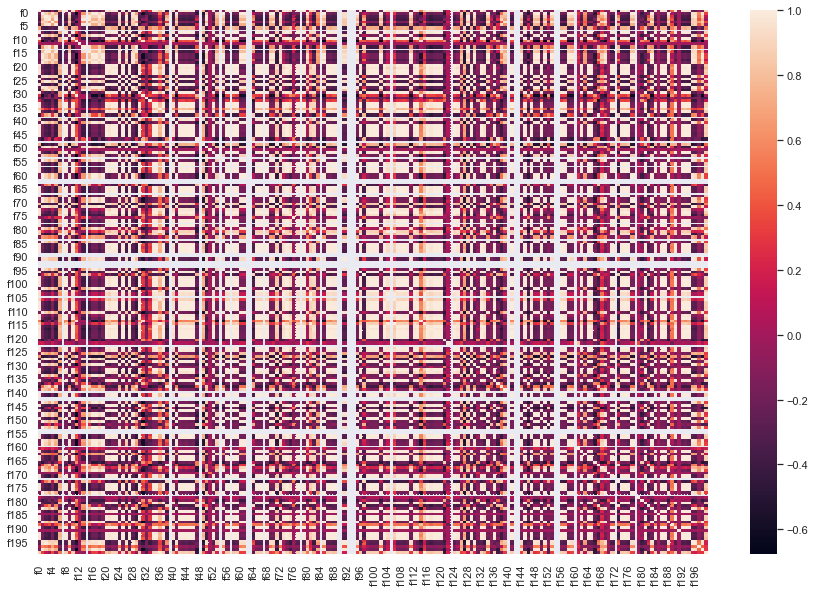

In [39]:
sns.heatmap(correlationMatrix)

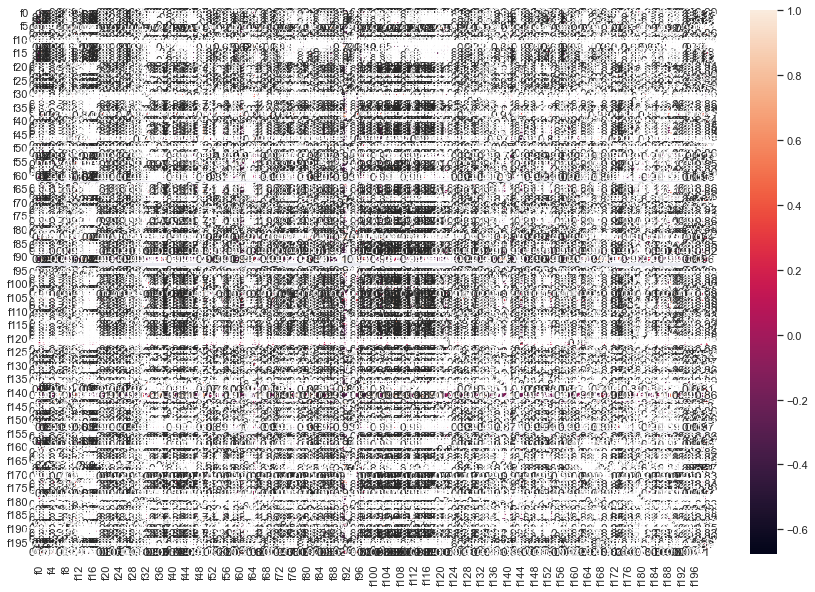

In [40]:
sns.heatmap(correlationMatrix, annot=True)